In [62]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [63]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Connect to the SQLite database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()

# Fetch the data
query = """
SELECT transaction_id, block_index, input_addresses_x, input_amounts_x, output_addresses_y, output_amounts_y, timestamp
FROM Transactions
"""
cursor.execute(query)
data = cursor.fetchall()

# Close the database connection
conn.close()

# Convert to DataFrame
df = pd.DataFrame(data, columns=[
    'Transaction ID', 'Block Index', 'Input Addresses', 'Input Amounts',
    'Output Addresses', 'Output Amounts', 'Timestamp'
])

# Convert JSON strings to Python lists
df['Input Amounts'] = df['Input Amounts'].apply(json.loads)
df['Output Amounts'] = df['Output Amounts'].apply(json.loads)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])



In [64]:
print(df['Timestamp']['2021-12-23'])

KeyError: '2021-12-23'

#Total Transaction VOlume over Tine


C:\Users\sinth\AppData\Local\Temp\ipykernel_29004\1414516157.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Timestamp').resample('M')[['Total Input', 'Total Output']].sum().plot(marker='o', figsize=(12, 6))


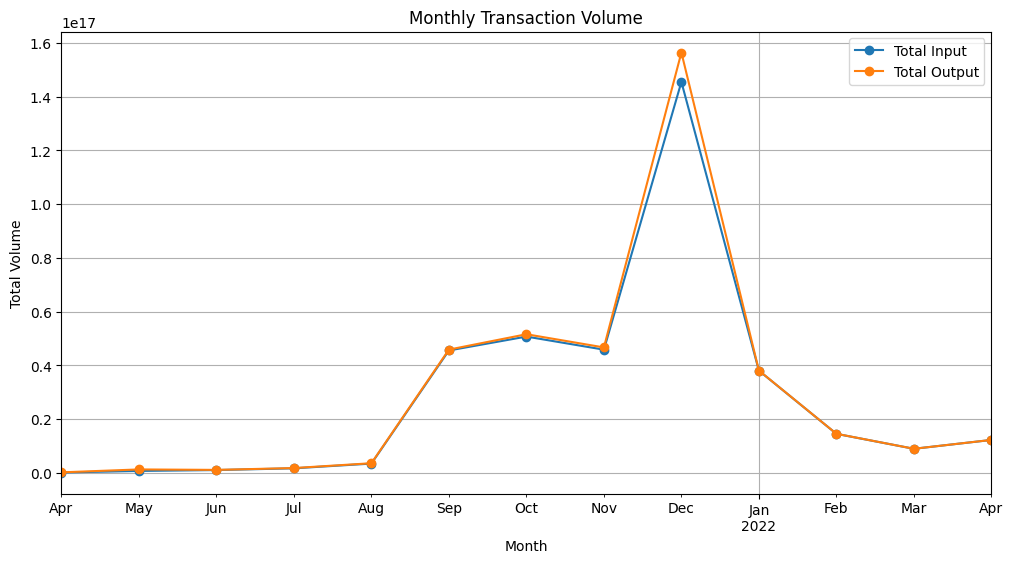

In [ ]:
# Calculate the total input and output amounts
df['Total Input'] = df['Input Amounts'].apply(lambda x: sum(x) if isinstance(x, list) else 0)
df['Total Output'] = df['Output Amounts'].apply(lambda x: sum(x) if isinstance(x, list) else 0)

# Plotting total transaction volumes over time
df.set_index('Timestamp').resample('M')[['Total Input', 'Total Output']].sum().plot(marker='o', figsize=(12, 6))
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.grid(True)
plt.show()






In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('iotaDB.db')
cursor = conn.cursor()

# Fetch the transaction data from the database
query = """
SELECT timestamp, input_amounts_x, output_amounts_y FROM Transactions
"""
df = pd.read_sql_query(query, conn, parse_dates=['timestamp'])

# Close the database connection
conn.close()

# Ensure the 'timestamp' is of datetime type and set it as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Resample the data to monthly and sum up the inputs and outputs
monthly_data = df.resample('M').agg({
    'input_amounts_x': 'sum',
    'output_amounts_y': 'sum'
})

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['input_amount'], marker='o', linestyle='-', color='blue', label='Total Input')
plt.plot(monthly_data.index, monthly_data['output_amount'], marker='o', linestyle='-', color='orange', label='Total Output')
plt.axvline(x=pd.to_datetime('2022-12-01'), color='red', linestyle='--', label='Spike in Dec 2022')
plt.title('Monthly Transaction Volume with December Spike Highlighted')
plt.xlabel('Month')
plt.ylabel('Transaction Volume (in units)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\sinth\AppData\Local\Temp\ipykernel_29004\306557641.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').agg({


KeyError: 'input_amount'

<Figure size 1200x600 with 0 Axes>